In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
from sklearn.decomposition import KernelPCA
from sklearn.random_projection import GaussianRandomProjection

In [14]:
df = pd.read_csv('claims_fraud_data_cleaned.csv')
df = df[:3000]

In [15]:
pd.set_option('display.max_columns', None)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Fraud_Found_Binary,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident(Numerical),Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled(Numerical),WitnessPresent,AgentType,NumberOfSuppliments,DriverRating.1,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,21,1,Sport - Liability,Sport,70000,0,1,12,300,1,30.0,30.0,0,3,28,0,0,0,0,1,3.5,1994,Liability
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,34,1,Sport - Collision,Sport,70000,0,2,15,400,4,30.0,30.0,0,6,33,1,0,0,0,4,1.0,1994,Collision
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,47,1,Sport - Collision,Sport,70000,0,3,7,400,3,30.0,30.0,1,7,45,0,0,0,0,3,1.0,1994,Collision
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,65,0,Sedan - Liability,Sport,25000,0,4,4,400,2,30.0,30.0,1,8,57,1,0,0,6,2,1.0,1994,Liability
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,27,0,Sport - Collision,Sport,70000,0,5,3,400,1,30.0,30.0,0,5,33,0,0,0,0,1,1.0,1994,Collision


In [16]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Fraud_Found_Binary', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days:Policy-Accident(Numerical)',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled(Numerical)', 'WitnessPresent',
       'AgentType', 'NumberOfSuppliments', 'DriverRating.1', 'NumberOfCars',
       'Year', 'BasePolicy'],
      dtype='object')

In [17]:
df_selected = df[['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age','PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Fraud_Found_Binary','Fault', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days:Policy-Accident(Numerical)',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled(Numerical)', 'WitnessPresent',
       'AgentType', 'NumberOfSuppliments', 'DriverRating.1', 'NumberOfCars',
       'Year', 'BasePolicy']]

# df_selected = df[['AccidentArea',
#        'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
#        'MaritalStatus', 'Age','PolicyType', 'VehicleCategory',
#        'VehiclePrice', 'Fraud_Found_Binary','Fault', 'PolicyNumber', 'RepNumber',
#        'Deductible', 'DriverRating', 'Days:Policy-Accident(Numerical)',
#        'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
#        'AgeOfPolicyHolder', 'PoliceReportFiled(Numerical)', 'WitnessPresent',
#        'AgentType', 'NumberOfSuppliments', 'DriverRating.1', 'NumberOfCars',
#        'Year', 'BasePolicy']]

df_label = df['Fraud_Found_Binary']

In [18]:
df_selected.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,PolicyType,VehicleCategory,VehiclePrice,Fraud_Found_Binary,Fault,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident(Numerical),Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled(Numerical),WitnessPresent,AgentType,NumberOfSuppliments,DriverRating.1,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,1,Tuesday,Jan,1,0,Single,21,Sport - Liability,Sport,70000,0,1,1,12,300,1,30.0,30.0,0,3,28,0,0,0,0,1,3.5,1994,Liability
1,Jan,3,Wednesday,Honda,1,Monday,Jan,4,1,Single,34,Sport - Collision,Sport,70000,0,1,2,15,400,4,30.0,30.0,0,6,33,1,0,0,0,4,1.0,1994,Collision
2,Oct,5,Friday,Honda,1,Thursday,Nov,2,1,Married,47,Sport - Collision,Sport,70000,0,1,3,7,400,3,30.0,30.0,1,7,45,0,0,0,0,3,1.0,1994,Collision
3,Jun,2,Saturday,Toyota,0,Friday,Jul,1,1,Married,65,Sedan - Liability,Sport,25000,0,0,4,4,400,2,30.0,30.0,1,8,57,1,0,0,6,2,1.0,1994,Liability
4,Jan,5,Monday,Honda,1,Tuesday,Feb,2,0,Single,27,Sport - Collision,Sport,70000,0,0,5,3,400,1,30.0,30.0,0,5,33,0,0,0,0,1,1.0,1994,Collision


In [19]:
df_selected_ohe = pd.get_dummies(df_selected)
df_selected_ohe_np = np.array(df_selected_ohe).astype(np.float64)

In [20]:
df_selected_ohe.head()

,WeekOfMonth,AccidentArea,WeekOfMonthClaimed,Sex,Age,VehiclePrice,Fraud_Found_Binary,Fault,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident(Numerical),Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled(Numerical),WitnessPresent,AgentType,NumberOfSuppliments,DriverRating.1,NumberOfCars,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ford,Make_Honda,Make_Jaguar,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,DayOfWeekClaimed_0,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_0,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,1,0,21,70000,0,1,1,12,300,1,30.0,30.0,0,3,28,0,0,0,0,1,3.5,1994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,3,1,4,1,34,70000,0,1,2,15,400,4,30.0,30.0,0,6,33,1,0,0,0,4,1.0,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,5,1,2,1,47,70000,0,1,3,7,400,3,30.0,30.0,1,7,45,0,0,0,0,3,1.0,1994,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,2,0,1,1,65,25000,0,0,4,4,400,2,30.0,30.0,1,8,57,1,0,0,6,2,1.0,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,5,1,2,0,27,70000,0,0,5,3,400,1,30.0,30.0,0,5,33,0,0,0,0,1,1.0,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [21]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)
    
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds
    
    
def plotreconstruction(xtrain,xinverse,label,algo):
    
    a = np.array(np.mean(np.power(xtrain - xinverse, 2), axis=1))

    fig, ax = plt.subplots()
    scatter_x = np.array(range(len(df)))
    scatter_y = a
    group = np.array(label)
    for g in np.unique(group):
        i = np.where(group == g)
        ax.scatter(scatter_x[i], scatter_y[i], label=g)
    ax.legend()
    
    plt.xlabel('Data point index')
    plt.ylabel('Reconstruction error')
    plt.title('Reconstruction error for ' + algo)
    plt.show()



In [22]:
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_selected_ohe_np)

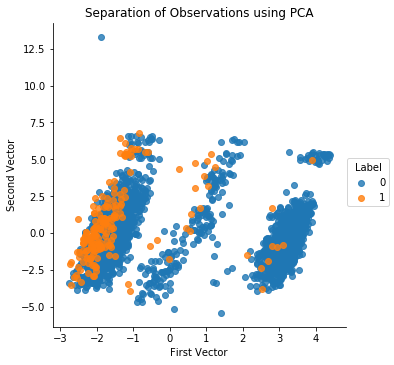

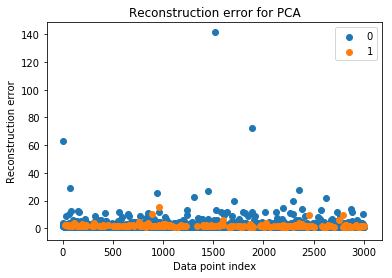

In [23]:
whiten = False
random_state = 2018

pca = PCA(whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(scaled_df)
X_train_PCA = pd.DataFrame(data=X_train_PCA)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse)

scatterPlot(X_train_PCA, df_label, "PCA")
plotreconstruction(X_train_PCA,X_train_PCA_inverse,df_label, "PCA")

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


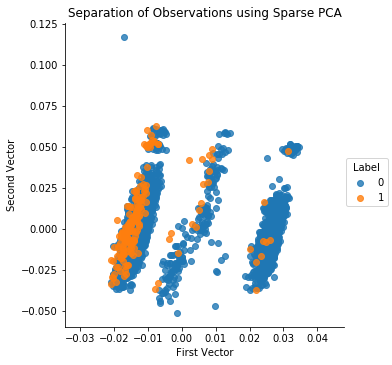

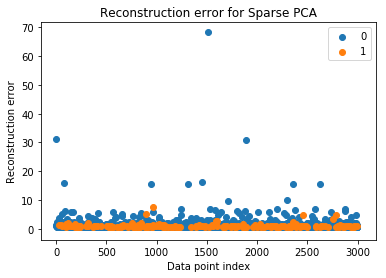

In [24]:
from sklearn.decomposition import SparsePCA


alpha = 0.001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(scaled_df)
X_train_sparsePCA = sparsePCA.transform(scaled_df)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA)

scatterPlot(X_train_sparsePCA, df_label, "Sparse PCA")
plotreconstruction(scaled_df,X_train_sparsePCA,df_label, "Sparse PCA")

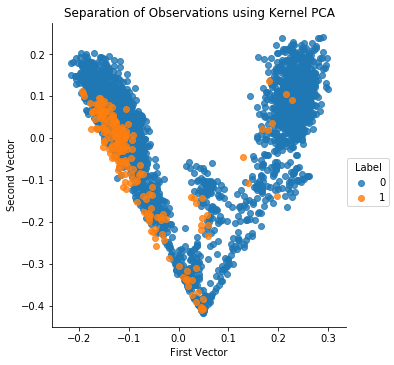

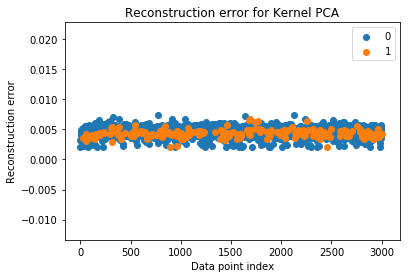

In [25]:
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(kernel=kernel, \
                gamma=gamma, fit_inverse_transform= \
                fit_inverse_transform, n_jobs=n_jobs, \
                random_state=random_state)

kernelPCA.fit(scaled_df)
X_train_kernelPCA = kernelPCA.transform(scaled_df)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse)

scatterPlot(X_train_kernelPCA, df_label, "Kernel PCA")
plotreconstruction(X_train_kernelPCA,X_train_kernelPCA_inverse,df_label, "Kernel PCA")

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


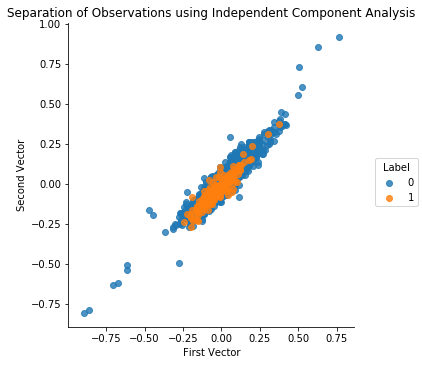

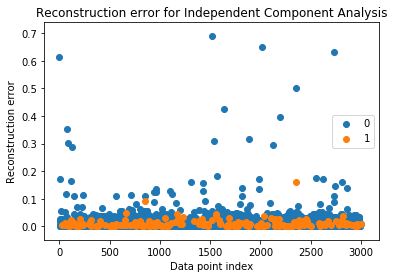

In [26]:
from sklearn.decomposition import FastICA


algorithm = 'parallel'
whiten = True
max_iter = 200
random_state = 2018

fastICA = FastICA(algorithm=algorithm, whiten=whiten, max_iter=max_iter, \
    random_state=random_state)

X_train_fastICA = fastICA.fit_transform(scaled_df)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse)

scatterPlot(X_train_fastICA, df_label, "Independent Component Analysis")
plotreconstruction(X_train_fastICA,X_train_fastICA_inverse,df_label, "Independent Component Analysis")
